In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

#for constant result
np.random.seed(0)

In [7]:
from keras.utils import np_utils

<h3>Getting Dataset</h3>

In [8]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [9]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


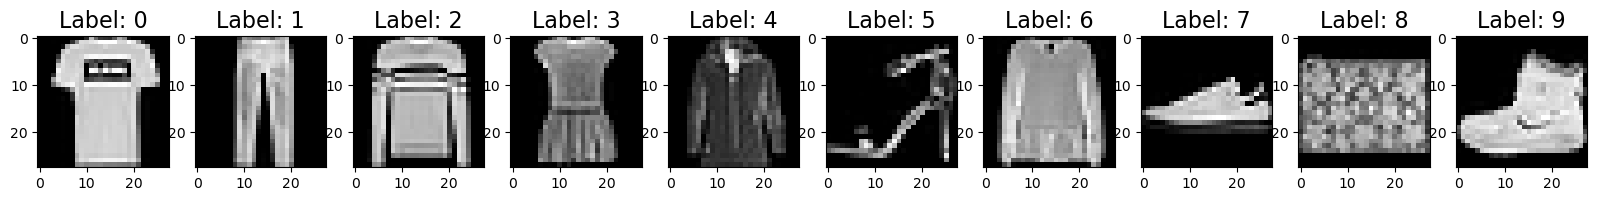

In [10]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize = (20, 20))

for i in range(0, num_classes):
    sample = x_train[y_train == i][0]
    ax[i].imshow(sample, cmap = 'gray')
    ax[i].set_title('Label: {}'.format(i), fontsize = 16)

In [12]:
for i in range(10):
    print(y_train[i])

9
0
0
3
0
2
7
2
5
5


In [13]:
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [14]:
for i in range(10):
    print(y_train[i])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h3>Data preparation</h3>

In [15]:
#Normalize data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [16]:
#Reshape data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [17]:
model = Sequential()

model.add(Dense(units= 128, input_shape = (784, ), activation = "relu"))
model.add(Dense(units = 128, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer = "adam", metrics=["accuracy"])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


<h3>Training model</h3>

In [26]:
batch_size = 512
epochs = 25
model.fit(x = x_train, y = y_train, batch_size = batch_size, epochs = epochs)

Epoch 1/25
118/118 [==============================] - 0s 3ms/step - loss: 0.0403 - accuracy: 0.9847
Epoch 2/25
118/118 [==============================] - 0s 3ms/step - loss: 0.0521 - accuracy: 0.9798
Epoch 3/25
118/118 [==============================] - 0s 3ms/step - loss: 0.0464 - accuracy: 0.9824
Epoch 4/25
118/118 [==============================] - 0s 2ms/step - loss: 0.0426 - accuracy: 0.9838
Epoch 5/25
118/118 [==============================] - 0s 3ms/step - loss: 0.0354 - accuracy: 0.9866
Epoch 6/25
118/118 [==============================] - 0s 3ms/step - loss: 0.0373 - accuracy: 0.9858
Epoch 7/25
118/118 [==============================] - 0s 3ms/step - loss: 0.0369 - accuracy: 0.9856
Epoch 8/25
118/118 [==============================] - 0s 3ms/step - loss: 0.0349 - accuracy: 0.9868
Epoch 9/25
118/118 [==============================] - 0s 3ms/step - loss: 0.0385 - accuracy: 0.9851
Epoch 10/25
118/118 [==============================] - 0s 3ms/step - loss: 0.0338 - accuracy: 0.9876

In [27]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.8015 - accuracy: 0.8930
Test Loss: 0.8015174865722656, Test Accuracy: 0.8930000066757202


In [28]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
print(y_pred)
print(y_pred_classes)

[[1.61779328e-24 1.58819464e-13 8.64725348e-15 ... 8.30507041e-09
  7.65071166e-13 1.00000000e+00]
 [1.60352694e-16 3.48013939e-26 1.00000000e+00 ... 1.14297606e-32
  2.88348378e-28 6.12388770e-33]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [2.05847370e-17 2.23095148e-32 7.98296176e-21 ... 3.77435325e-28
  1.00000000e+00 1.03373688e-30]
 [7.19704823e-30 1.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.57396357e-32 3.06123080e-36]
 [6.95020593e-13 1.40719158e-20 8.62647112e-21 ... 1.86403989e-10
  8.92348861e-10 9.97733098e-23]]
[9 2 1 ... 8 1 5]


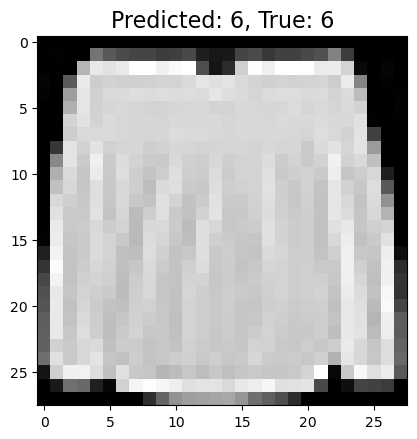

In [29]:
#an example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis = 1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize = 16)
plt.imshow(x_sample.reshape(28, 28), cmap = "gray")

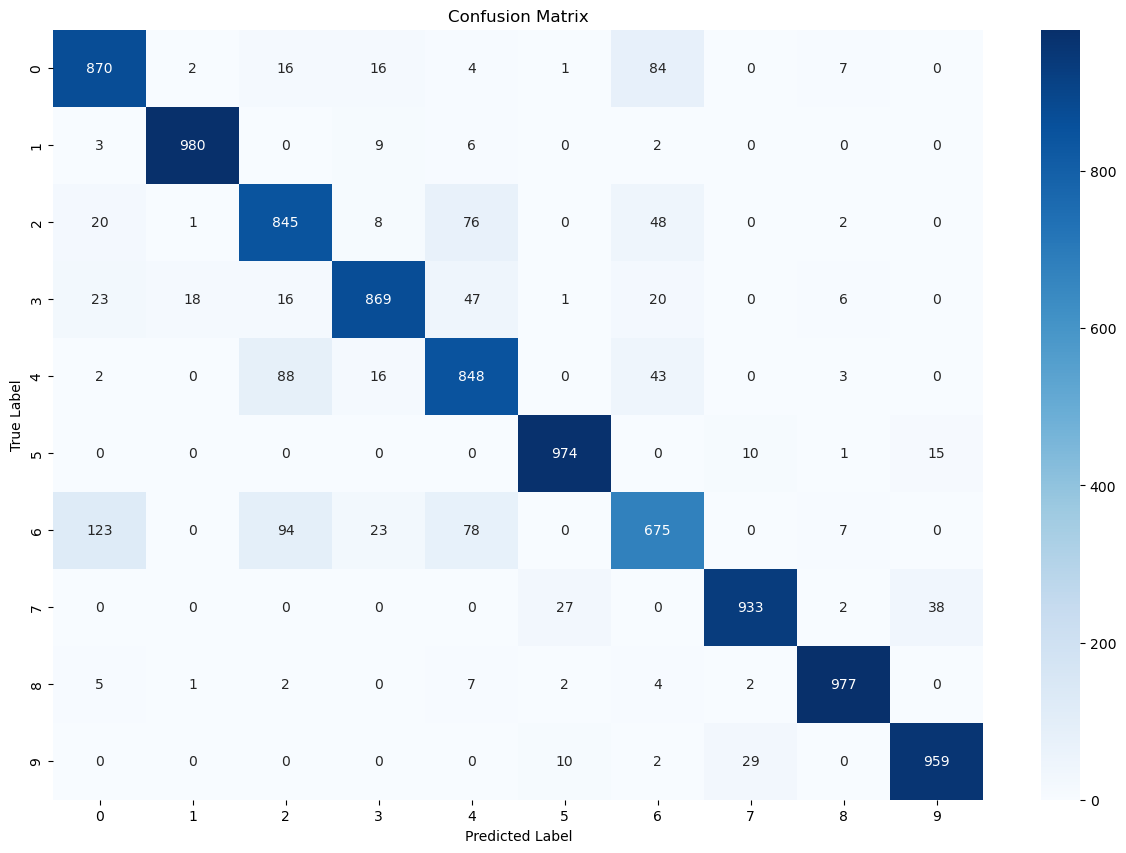

In [30]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

#Plot
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(confusion_mtx, annot = True, fmt = 'd', ax = ax, cmap = "Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
#semicolon for not printing the objetct details
ax.set_title('Confusion Matrix');

<h3>Investigate some errors</h3>

In [31]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [32]:
y_pred_erros_probability = np.max(y_pred_errors, axis = 1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis = 1))
diff_errors_pred_true = y_pred_erros_probability - true_probability_errors

#list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:]


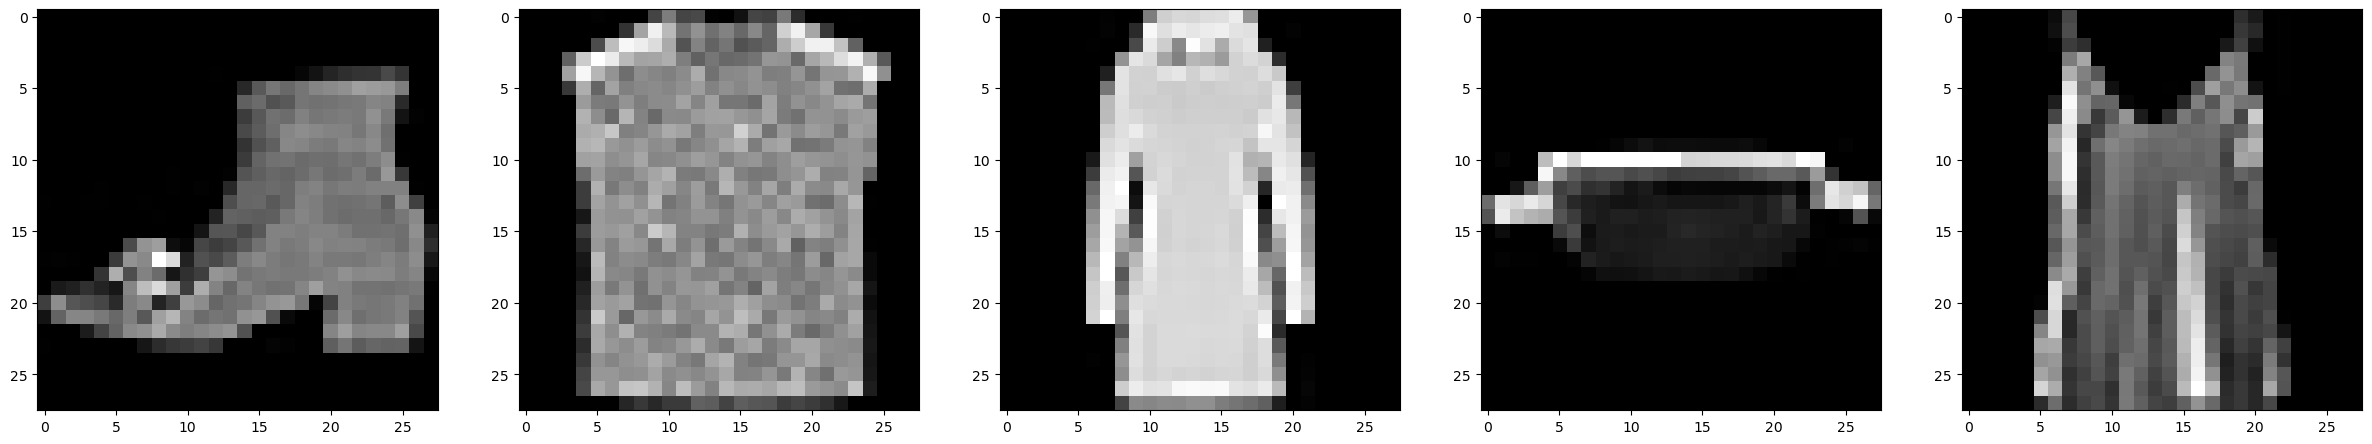

In [33]:
#Show top errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize = (30, 30))

for i in range(0, num):
    idx = top_idx_diff_errors[i]
    sample = x_test_errors[idx].reshape(28, 28)
    y_t = y_true_errors
    y_p = y_pred_classes_errors[idx]
    ax[i].imshow(sample, cmap = "gray")
